Steps I am going to follow:

1. Load the cleaned up data
2. Separate into train test
3. Try out the default Logistic Regression
4. Try out hyperparmeter tuning and different algos within Logistic
5. Repeat the steps above with normalized data
6. Repeat the steps above with PCA data

In [303]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss,classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest,skewtest,kurtosistest, spearmanr
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [61]:
df = pd.read_csv("./data/train_cleaned.csv")

In [89]:
# stratified split because of the class imbalances
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1, random_state=42)
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.1,
            train_size=None)


In [99]:
X = df.drop("target",axis=1)
y = df.target
train_index = []
test_index = []
for tr, tes in sss.split(X,y):
    print("TRAIN:", tr, "TEST:", tes)
    train_index = tr
    test_index = tes

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: [57972 30244  9427 ..., 60232 28576 27516] TEST: [59081 21681 51999 ...,  1777   269 53901]


### Logistic Regression

In [101]:
lr = LogisticRegression()

In [102]:
lr.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
lr.score(X_train,y_train)

0.7577482492368468

In [104]:
lr.score(X_test,y_test)

0.75646412411118291

In [105]:
log_loss(y_test, lr.predict_proba(X_test))

0.66941931541644217

## with non-default params

In [106]:
lr_params = LogisticRegression(penalty='l2',solver='newton-cg',tol=0.0001,multi_class='multinomial')
lr_params.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
lr_params.score(X_train,y_train)

0.76789369725264855

In [108]:
lr_params.score(X_test,y_test)

0.7648674854557207

In [109]:
log_loss(y_test, lr_params.predict_proba(X_test))

0.63582182616436778

## with Regularization

In [110]:
C_param_range = [0.01,0.1,1,10]
lr_regular = LogisticRegressionCV(Cs=C_param_range,penalty='l2',solver='newton-cg',tol=0.0001,multi_class='multinomial')

In [111]:
lr_regular

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=None,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='newton-cg',
           tol=0.0001, verbose=0)

In [112]:
lr_regular.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=None,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='newton-cg',
           tol=0.0001, verbose=0)

In [121]:
lr_regular.get_params()

{'Cs': [0.01, 0.1, 1, 10],
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0}

In [127]:
lr_regular.score(X_train,y_train)

0.76787574070748787

In [113]:
lr_regular.score(X_test,y_test)

0.76551389786683899

In [114]:
log_loss(y_test, lr_regular.predict_proba(X_test))

0.63610555329603913

## Regulariaztion using gridsearchcv

In [123]:
C_param_range = [0.01,0.1,1,10]
lr_grid_regular = LogisticRegression(penalty='l2',solver='newton-cg',tol=0.0001,multi_class='multinomial')

grid_cv = GridSearchCV(lr_grid_regular,cv=5,param_grid={'C':C_param_range})

In [124]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [128]:
lr_regular.score(X_train,y_train)

0.76787574070748787

In [125]:
grid_cv.score(X_test,y_test)

0.7648674854557207

In [129]:
log_loss(y_test, grid_cv.predict_proba(X_test))

0.63582182616436778

## K-NN 

In [130]:
knn = KNeighborsClassifier(n_neighbors=5)

In [131]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
knn.score(X_train,y_train)

0.84627401687915249

In [133]:
knn.score(X_test,y_test)

0.77294764059469945

In [134]:
log_loss(y_test, knn.predict_proba(X_test))

2.6210489037522997

### Random Forest

In [296]:
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [297]:
#fitting on entire data set
rf_classifier.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
rf_classifier.score(X_test,y_test)

1.0

In [299]:
# fitting on only training set
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [301]:
rf_classifier.score(X_train,y_train)

1.0

In [300]:
rf_classifier.score(X_test,y_test)

0.80753070458952814

In [302]:
log_loss(y_test, rf_classifier.predict_proba(X_test))

0.56270788570107788

### Gradient Boosting

In [307]:
# should apply grid search
clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [308]:
clf.score(X_train,y_train)

0.88825641946489498

In [309]:
clf.score(X_test,y_test)

0.81221719457013575

In [310]:
log_loss(y_test, clf.predict_proba(X_test))

0.49693438013197561

# Using normalized data now onwards

In [136]:
df_norm = pd.read_csv("./data/train_norm.csv")

In [137]:
X = df_norm.drop("target",axis=1)
y = df_norm.target
train_index = []
test_index = []
for tr, tes in sss.split(X,y):
    print("TRAIN:", tr, "TEST:", tes)
    train_index = tr
    test_index = tes

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: [57972 30244  9427 ..., 60232 28576 27516] TEST: [59081 21681 51999 ...,  1777   269 53901]


In [138]:
lr = LogisticRegression()

In [139]:
lr.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
lr.score(X_train, y_train)

0.75715568324654337

In [141]:
lr.score(X_test,y_test)

0.7553329023917259

In [142]:
log_loss(y_test,lr.predict_proba(X_test))

0.67151185567872029

## regularization

In [143]:
C_param_range = [0.1,1,10]
lr_grid_regular = LogisticRegression(penalty='l2',solver='newton-cg',tol=0.0001,multi_class='multinomial')

grid_cv = GridSearchCV(lr_grid_regular,cv=5,param_grid={'C':C_param_range})

In [144]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [146]:
grid_cv.score(X_train, y_train)

0.76791165379780935

In [147]:
grid_cv.score(X_test, y_test)

0.76567550096961867

In [148]:
log_loss(y_test,grid_cv.predict_proba(X_test))

0.63611216616338062

In [151]:
print(classification_report(y_test, grid_cv.predict(X_test)))

             precision    recall  f1-score   support

          1       0.67      0.43      0.53       193
          2       0.64      0.87      0.74      1612
          3       0.55      0.30      0.39       800
          4       0.70      0.30      0.42       269
          5       0.95      0.95      0.95       274
          6       0.92      0.92      0.92      1414
          7       0.70      0.57      0.63       284
          8       0.87      0.92      0.89       846
          9       0.84      0.87      0.86       496

avg / total       0.76      0.77      0.75      6188



In [152]:
print(confusion_matrix(y_test,grid_cv.predict(X_test)))

[[  83    8    1    0    0   20    4   34   43]
 [   2 1405  148   20    6    7   14    5    5]
 [   0  534  244    6    0    1   11    4    0]
 [   0  142   25   81    3   12    6    0    0]
 [   0   14    0    0  260    0    0    0    0]
 [   6   24    2    4    2 1295   24   35   22]
 [   3   44   22    3    1   32  162   15    2]
 [  15    9    2    1    0   24   10  775   10]
 [  14   11    0    0    1   16    1   20  433]]


### Decision Tree

In [290]:
dt_classifier = DecisionTreeClassifier(max_features=30,min_samples_split=100,min_samples_leaf=10,max_leaf_nodes=500,random_state=42)

In [291]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=30, max_leaf_nodes=500, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [292]:
dt_classifier.score(X_train,y_train)

0.73708026575686836

In [293]:
dt_classifier.score(X_test,y_test)

0.71315449256625729

In [159]:
print(classification_report(y_test, dt_classifier.predict(X_test)))

             precision    recall  f1-score   support

          1       0.43      0.40      0.41       193
          2       0.70      0.70      0.70      1612
          3       0.44      0.46      0.45       800
          4       0.41      0.43      0.42       269
          5       0.94      0.93      0.94       274
          6       0.88      0.88      0.88      1414
          7       0.50      0.51      0.50       284
          8       0.86      0.82      0.84       846
          9       0.74      0.74      0.74       496

avg / total       0.71      0.71      0.71      6188



In [160]:
print(confusion_matrix(y_test,dt_classifier.predict(X_test)))

[[  77   10    4    3    1   24   17   22   35]
 [   9 1122  324   79    6   10   28   11   23]
 [   3  320  369   55    0    4   29   12    8]
 [   0   67   64  117    2   12    3    2    2]
 [   1    7    3    2  256    2    0    1    2]
 [  16   23   10   18    4 1246   36   32   29]
 [  16   23   34   10    1   35  144   10   11]
 [  30   15   10    1    3   51   26  693   17]
 [  29   15   15    3    0   34    6   25  369]]


In [168]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(dt_classifier, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Using pca features now onwards

In [30]:
df_pca = pd.read_csv("./data/train_norm_pca.csv")

In [31]:
df_train,df_test = train_test_split(df_pca, test_size=0.3)

In [32]:
X_train = df_train.drop("target",axis=1).iloc[:,0:30]
X_test =  df_test.drop("target",axis=1).iloc[:,0:30]

In [33]:
y_train = df_train.target
y_test = df_test.target

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
log_loss(y_test,lr.predict_proba(X_test))

0.79217255748125504

## regularization

In [ ]:
C_param_range = [0.01,0.1,1,10]
lr_grid_regular = LogisticRegression(penalty='l2',solver='newton-cg',tol=0.0001,multi_class='multinomial')

grid_cv = GridSearchCV(lr_grid_regular,cv=5,param_grid={'C':C_param_range})

In [ ]:
grid_cv.fit(X_train,y_train)

In [ ]:
log_loss(y_test,grid_cv.predict_proba(X_test))

### distribution of X (normalized features) for different classes

In [87]:
testdata = df_train[df_train.target==9].drop("target",axis=1)
normaltest(testdata,axis=None), skewtest(testdata,axis=None), kurtosistest(testdata,axis=None)
#testdata.describe()

(NormaltestResult(statistic=482006.58491928189, pvalue=0.0),
 SkewtestResult(statistic=591.62613601259363, pvalue=0.0),
 KurtosistestResult(statistic=363.29753660889304, pvalue=0.0))

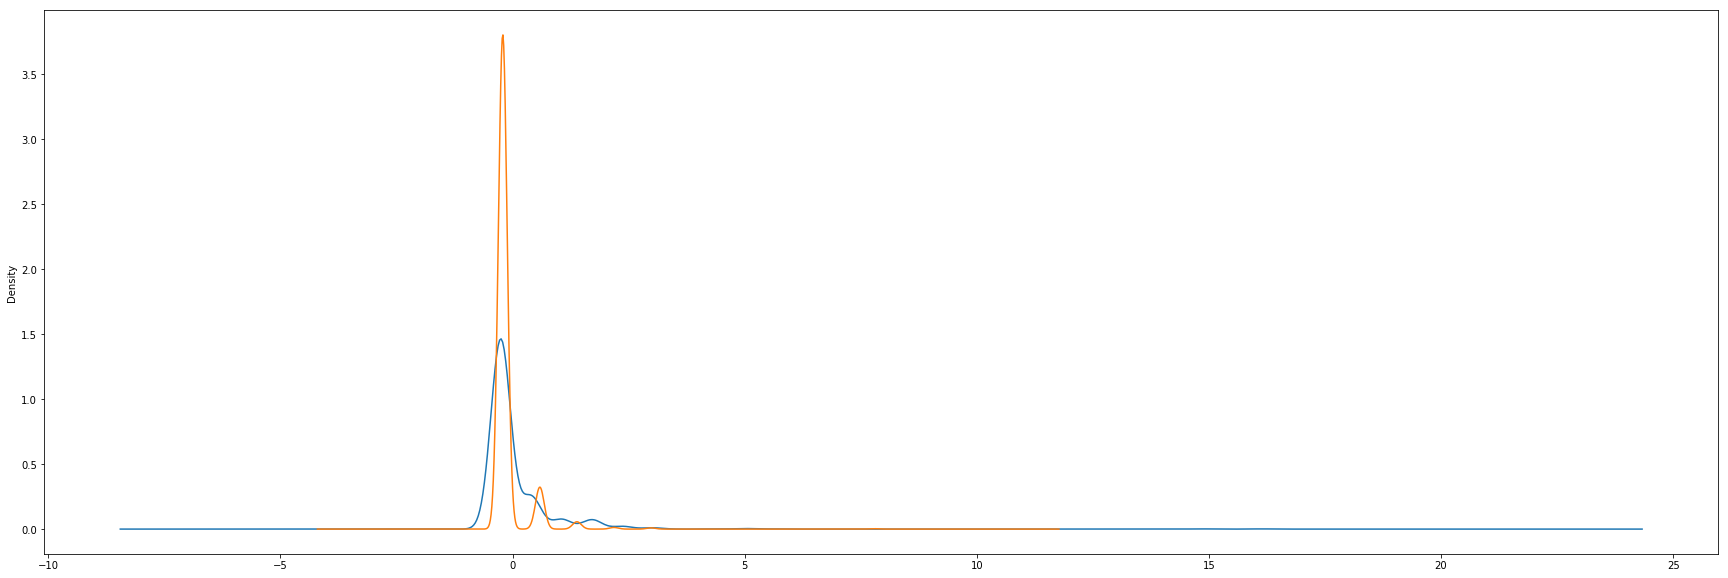

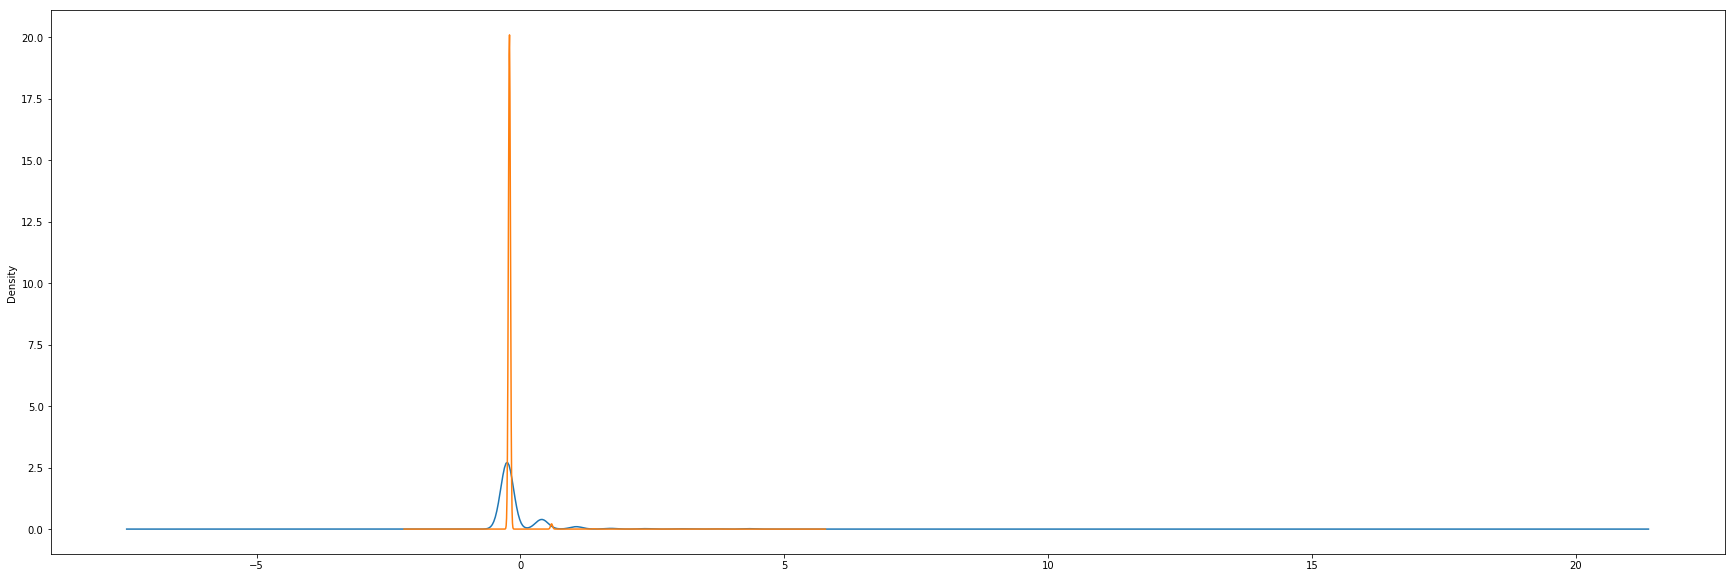

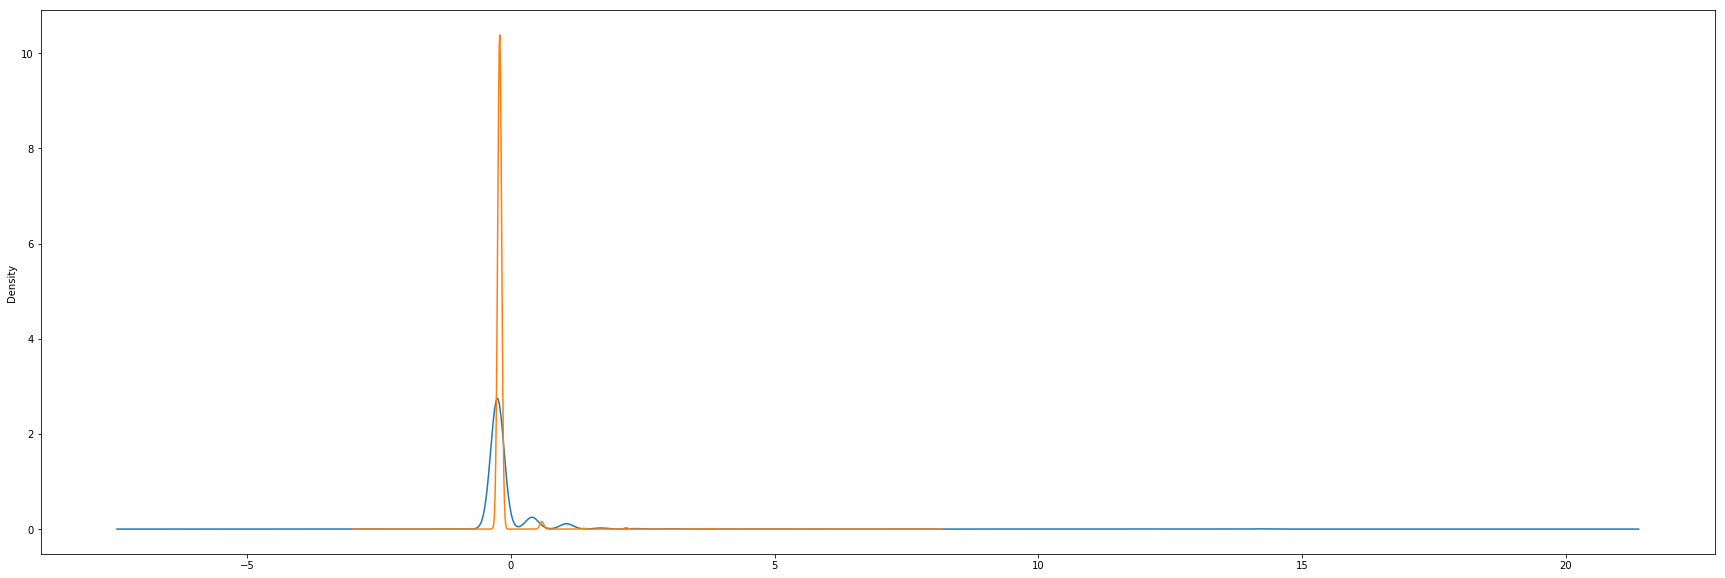

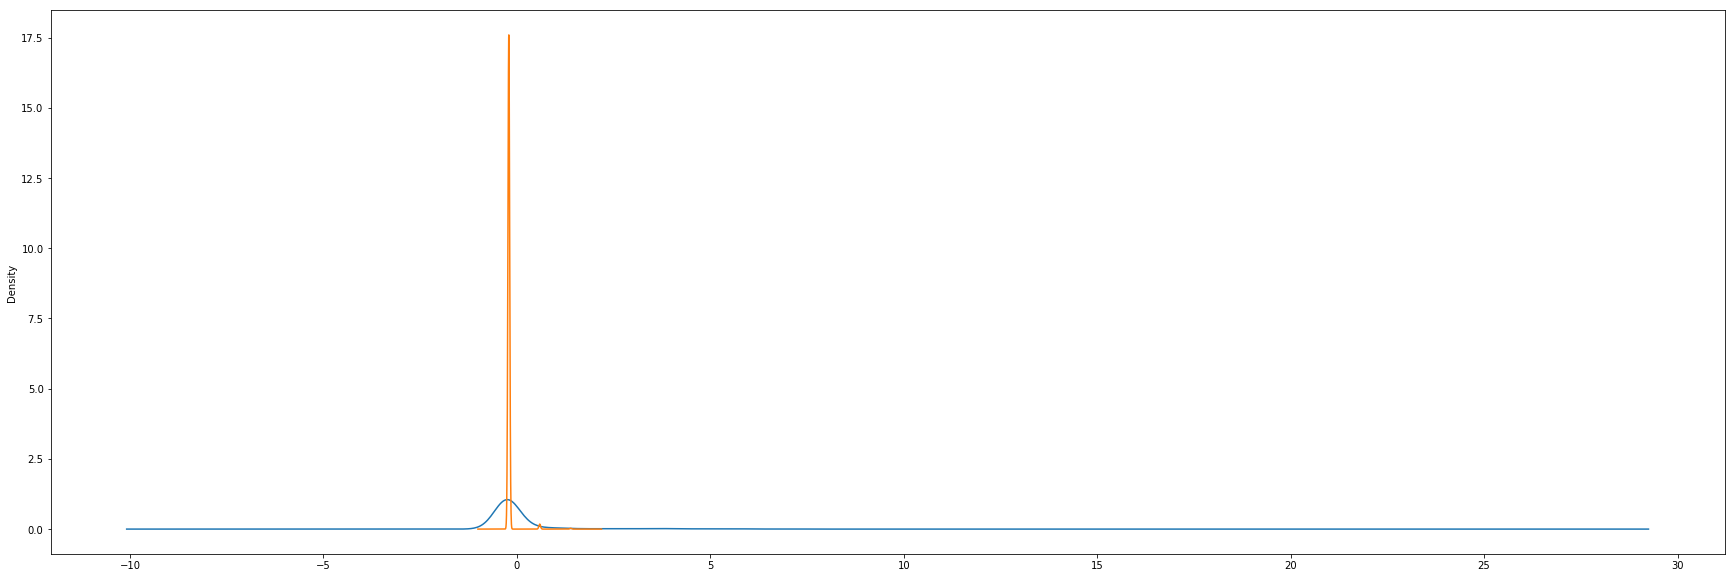

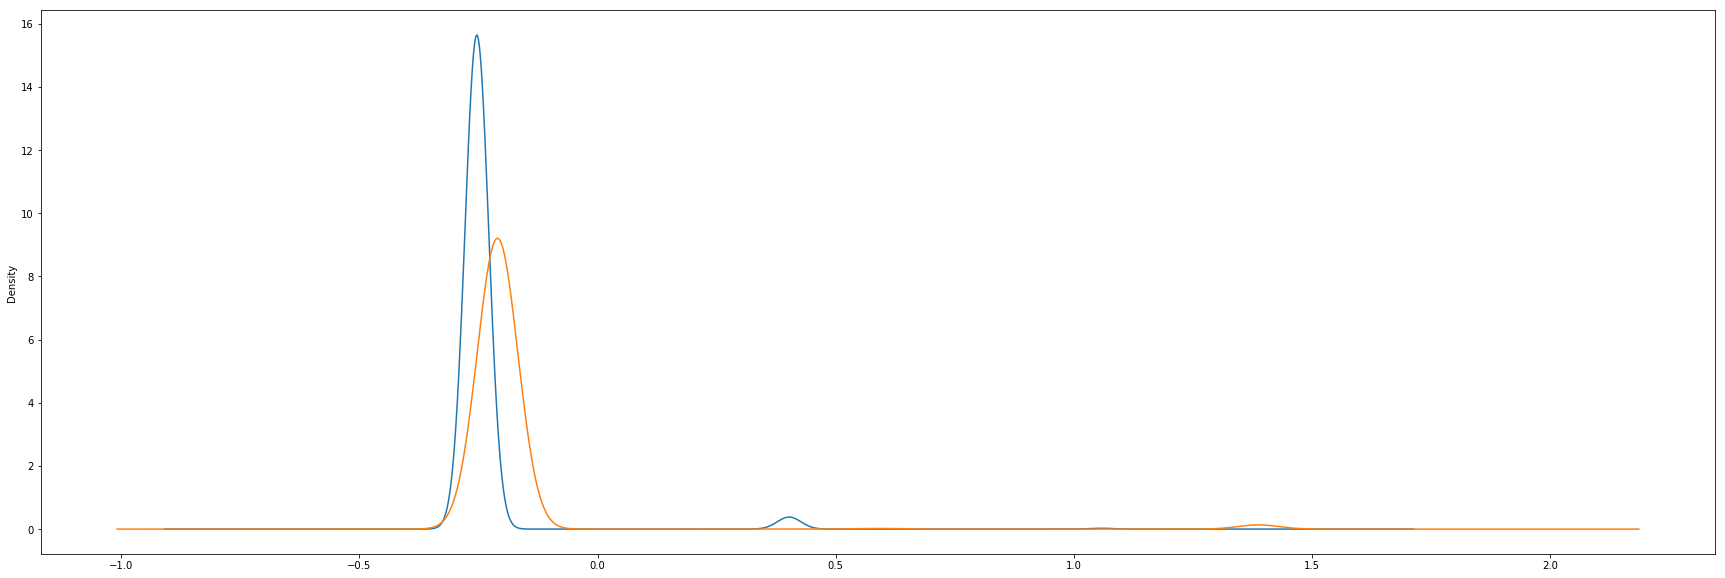

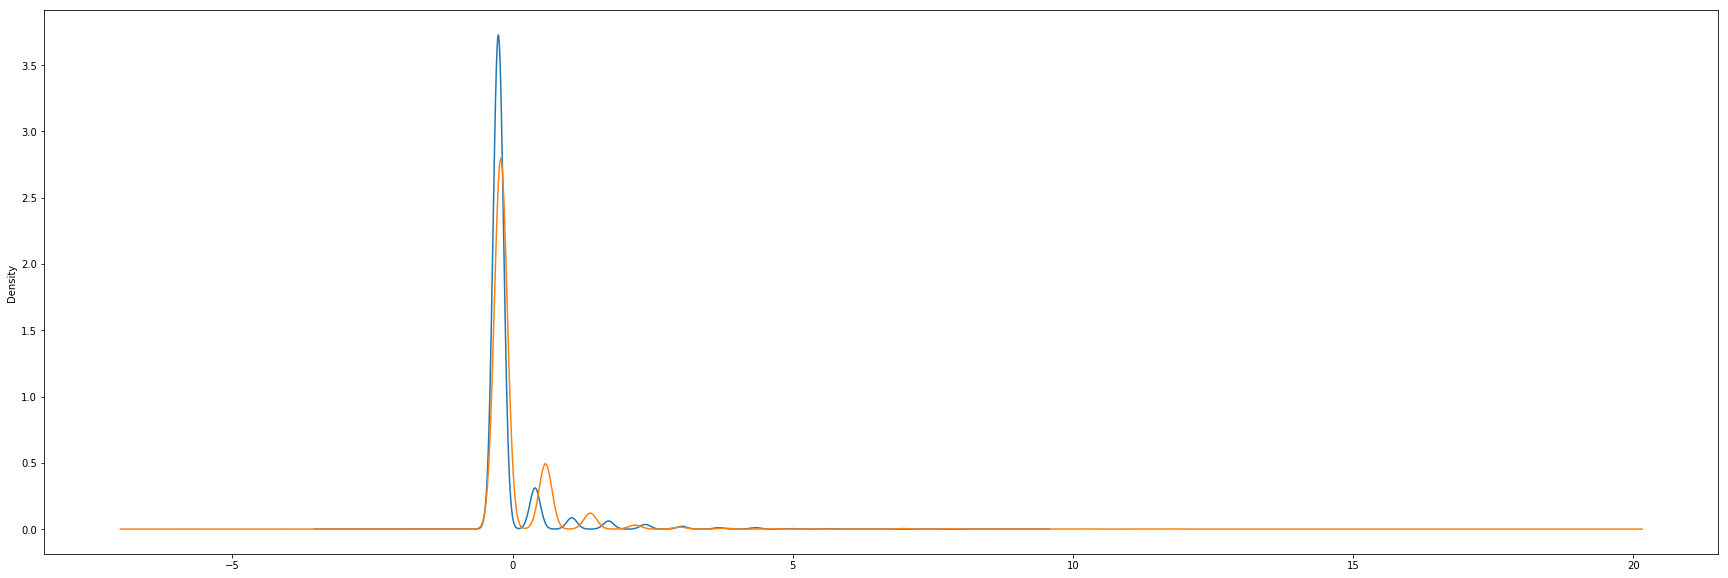

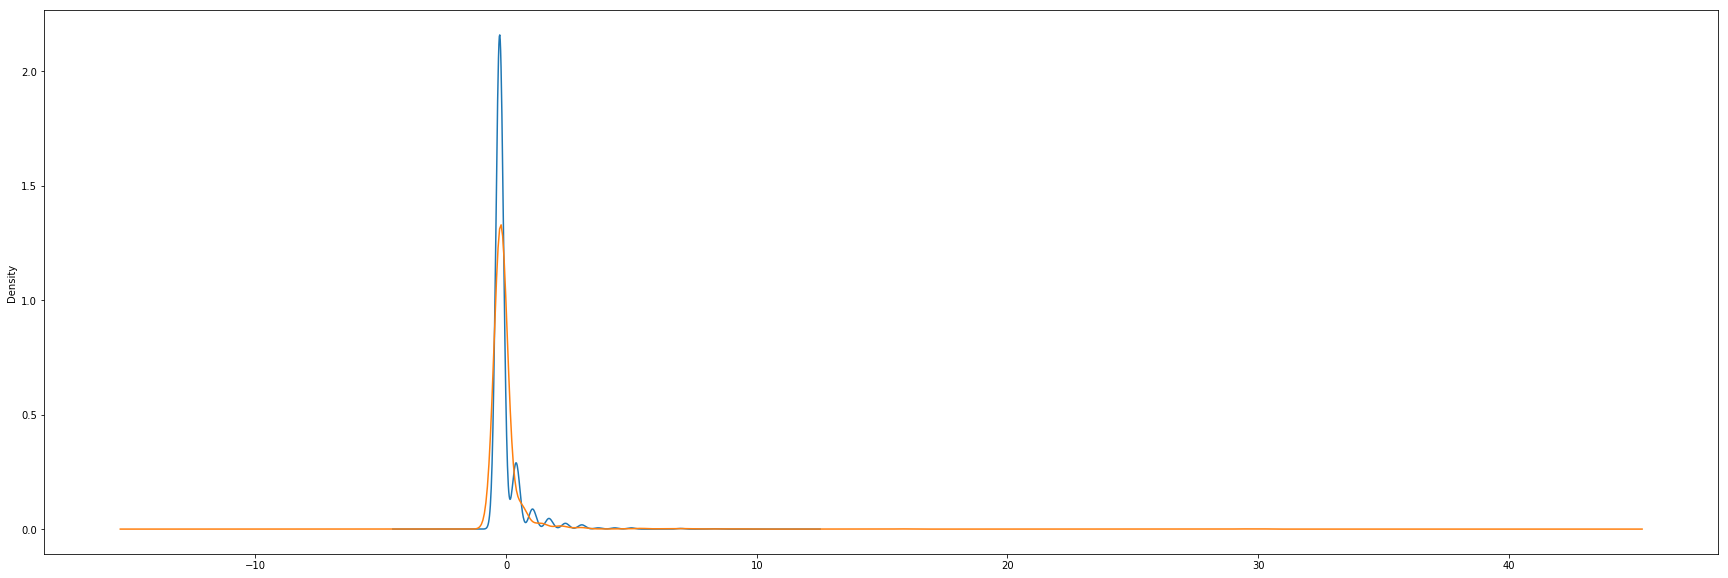

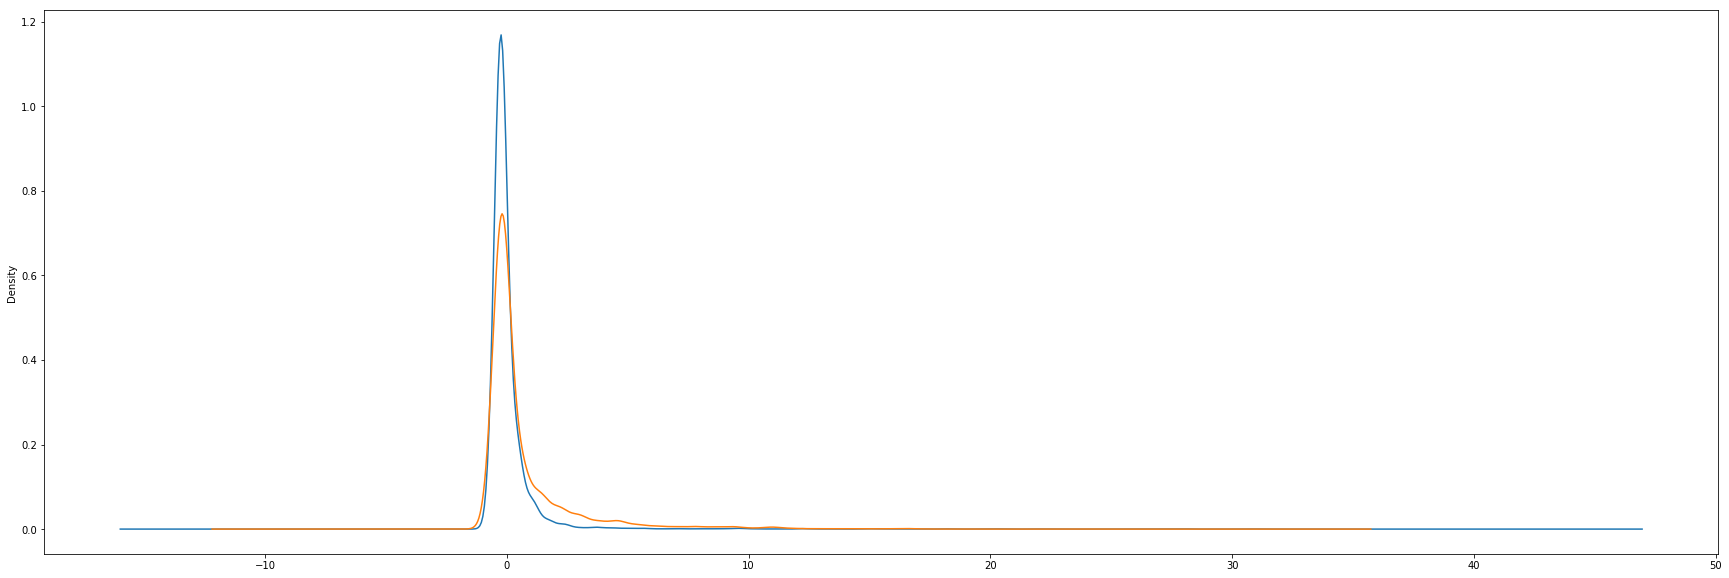

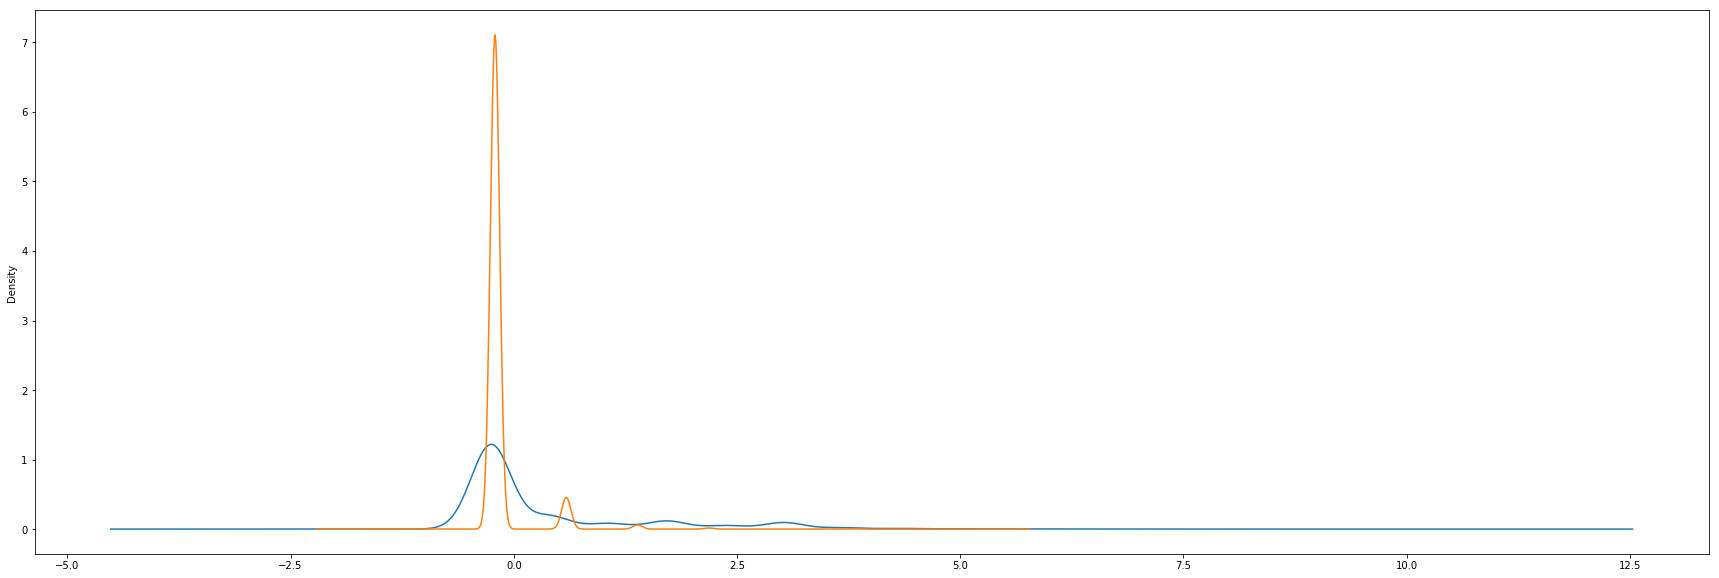

In [53]:
for i in np.arange(1,10,1):
    cat_data_temp = df_train[df_train.target==i].drop("target",axis=1)
    plt.figure(figsize=(30,10))
    

    for col in cat_data_temp.columns[0:2]:
         cat_data_temp[col].plot(kind="kde")

    
    plt.show()
    